In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Обрабатываем наш датасет на отсутсвующие значения и выбросы.

In [3]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)
    
    
HandleMissingValues(df)
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  object 
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df['Critic_Score'].describe().round(2)

count    16719.00
mean        70.01
std          9.78
min         13.00
25%         71.00
50%         71.00
75%         71.00
max         98.00
Name: Critic_Score, dtype: float64

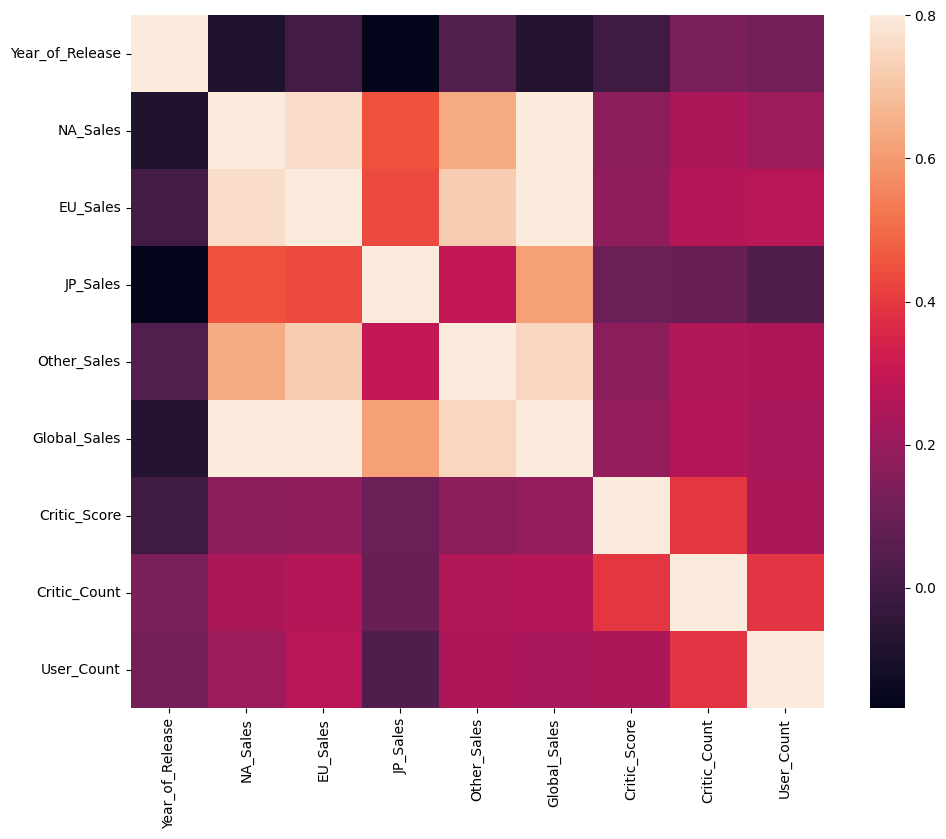

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df.select_dtypes(include=[np.number])
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
corr = df_num.corr()
print (corr['Critic_Score'].sort_values(ascending=False)[:4], '\n')
print (corr['Critic_Score'].sort_values(ascending=False)[-3:])

Critic_Score    1.000000
Critic_Count    0.394183
User_Count      0.242509
Global_Sales    0.189724
Name: Critic_Score, dtype: float64 

Other_Sales        0.170271
JP_Sales           0.098274
Year_of_Release   -0.006417
Name: Critic_Score, dtype: float64


In [10]:
df['Critic_Count'].describe().round(2)

count    16719.00
mean        23.61
std         13.51
min          3.00
25%         21.00
50%         21.00
75%         21.00
max        113.00
Name: Critic_Count, dtype: float64

In [11]:
df['User_Count'].describe().round(2)

count    16719.00
mean        86.75
std        384.38
min          4.00
25%         24.00
50%         24.00
75%         24.00
max      10665.00
Name: User_Count, dtype: float64

После просмотра корреляций с оценкой критикой мы выделили 2 сильные корреляциии (Количество критиков, что очевидно и Количество юзеров, что интереснее). Решаем ориентироваться на эту метрику в обучении модели. Для этого обрабатываем выбросы.

<Axes: ylabel='User_Count'>

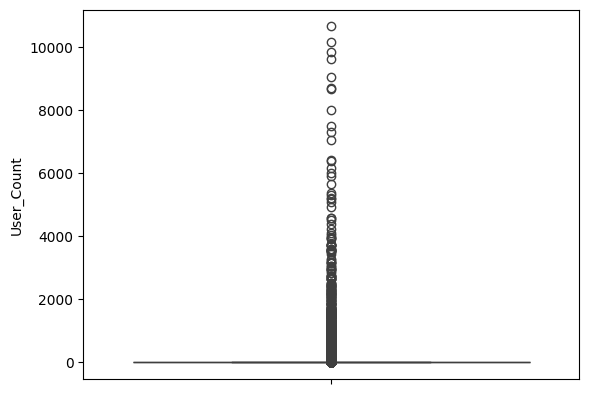

In [12]:
sns.boxplot(df['User_Count'])

In [13]:
from scipy import stats
z = np.abs(stats.zscore(df['User_Count']))
print(z)

0        0.612040
1        0.163264
2        1.618895
3        0.273821
4        0.163264
           ...   
16714    0.163264
16715    0.163264
16716    0.163264
16717    0.163264
16718    0.163264
Name: User_Count, Length: 16719, dtype: float64


In [14]:
z_scores = stats.zscore(df['User_Count'])
outliers_User_Count = df[(z_scores < -3) | (z_scores > 3)]
print(outliers_User_Count['User_Count'])

16       3994.0
17       1588.0
23       3711.0
29       8713.0
32       1454.0
          ...  
14612    1796.0
14623    4572.0
15293    3717.0
15676    2191.0
15853    2089.0
Name: User_Count, Length: 213, dtype: float64


In [15]:
from scipy.stats.mstats import winsorize
df['User_Count'] = winsorize(df['User_Count'], limits=[0.05, 0.05])

In [16]:
df['User_Count'].describe().round(2)

c:\Users\Писечка\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    16719.00
mean        44.11
std         64.07
min          6.00
25%         24.00
50%         24.00
75%         24.00
max        279.00
Name: User_Count, dtype: float64

In [17]:
df = df.assign(Popularity = "")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Popularity
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,279.0,Nintendo,E,
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,279.0,Nintendo,E,
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,


In [18]:
from sklearn.model_selection import train_test_split

Делим датасет на данные, у которых будет автоматическая разметка и данные, которые будем размечать в label studio.

In [19]:
subset_auto, subset_manual = train_test_split(df, test_size=0.05, random_state=42)
subset_manual.to_csv('manual.csv', index=False)
subset_auto.to_csv('auto.csv', index=False)

In [20]:
subset_auto['Popularity'] = 'Popular'

subset_auto.loc[subset_auto['User_Count'] < 44, 'Popularity'] = 'Not Popular' #44 среднее значение 

In [21]:
subset_auto.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Popularity
3615,NCAA Football 07,XB,2006.0,Sports,Electronic Arts,0.42,0.12,0.00,0.01,0.56,88.0,20.0,6.9,10.0,EA Sports,E,Not Popular
2054,Monster Rancher,PS,1997.0,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,86.0,5.0,8.3,10.0,Tecmo,UNKNOWN,Not Popular
8879,Castlevania: Lords of Shadow - Mirror of Fate,3DS,2013.0,Action,Konami Digital Entertainment,0.04,0.07,0.03,0.01,0.15,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
10762,Rapala Pro Bass Fishing 2010,DS,2010.0,Sports,Activision,0.09,0.00,0.00,0.01,0.10,71.0,21.0,tbd,24.0,Magic Pockets,E,Not Popular
15345,Balls of Fury,Wii,2007.0,Sports,Zoo Digital Publishing,0.02,0.00,0.00,0.00,0.02,19.0,6.0,2.8,25.0,Black Lantern Studios,E10+,Not Popular
1411,Final Fantasy XII: Revenant Wings,DS,2007.0,Role-Playing,Square Enix,0.33,0.41,0.54,0.10,1.37,81.0,44.0,6.1,60.0,"Square Enix, Think and Feel",E10+,Popular
11976,SimCity 4: Deluxe Edition,PC,2003.0,Simulation,Electronic Arts,0.00,0.06,0.00,0.01,0.07,71.0,21.0,8.3,37.0,Maxis,E,Not Popular
7369,NOëL: NOT DiGITAL,PS,1996.0,Adventure,Pioneer LDC,0.00,0.00,0.20,0.01,0.21,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
10671,Bleach: Dark Souls (JP sales),DS,2007.0,Fighting,Sega,0.00,0.00,0.10,0.00,0.10,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
11110,Kenka Banchou 2: Full Throttle,PS2,2007.0,Action,Spike,0.00,0.00,0.09,0.00,0.09,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular


In [22]:
subset_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15883 entries, 3615 to 15795
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15883 non-null  object 
 1   Platform         15883 non-null  object 
 2   Year_of_Release  15883 non-null  float64
 3   Genre            15883 non-null  object 
 4   Publisher        15883 non-null  object 
 5   NA_Sales         15883 non-null  float64
 6   EU_Sales         15883 non-null  float64
 7   JP_Sales         15883 non-null  float64
 8   Other_Sales      15883 non-null  float64
 9   Global_Sales     15883 non-null  float64
 10  Critic_Score     15883 non-null  float64
 11  Critic_Count     15883 non-null  float64
 12  User_Score       15883 non-null  object 
 13  User_Count       15883 non-null  float64
 14  Developer        15883 non-null  object 
 15  Rating           15883 non-null  object 
 16  Popularity       15883 non-null  object 
dtypes: float64(9),

In [23]:
subset_auto.to_csv('auto.csv', index=False)

Данные из множества для разметки в label studio ДО разметки.

In [24]:
df_manual = pd.read_csv('manual.csv')
df_manual.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Popularity
0,The Incredible Hulk: Ultimate Destruction,XB,2005.0,Action,Vivendi Games,0.17,0.05,0.00,0.01,0.23,84.0,47.0,8,22.0,Radical Entertainment,T,NaN
1,Datenshi no Amai Yuuwaku x Kaikan Phrase,DS,2010.0,Adventure,FuRyu,0.00,0.00,0.01,0.00,0.01,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,NaN
2,NBA 2K17,X360,2016.0,Sports,Take-Two Interactive,0.09,0.02,0.00,0.01,0.12,71.0,21.0,3.4,11.0,2K Games,E,NaN
3,Scooby-Doo! Unmasked,DS,2005.0,Platform,THQ,0.07,0.01,0.00,0.01,0.09,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,NaN
4,Left Brain Right Brain: Use Both Hands Train B...,DS,2007.0,Misc,505 Games,0.15,0.00,0.00,0.01,0.16,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,NaN


Данные после работы над ними в label studio.

In [25]:
df_ls = pd.read_csv('manual_ls.csv')
df_ls.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Popularity
0,The Incredible Hulk: Ultimate Destruction,XB,2005.0,Action,Vivendi Games,0.17,0.05,0.00,0.01,0.23,84.0,47.0,8,22.0,Radical Entertainment,T,Not Popular
1,Datenshi no Amai Yuuwaku x Kaikan Phrase,DS,2010.0,Adventure,FuRyu,0.00,0.00,0.01,0.00,0.01,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
2,NBA 2K17,X360,2016.0,Sports,Take-Two Interactive,0.09,0.02,0.00,0.01,0.12,71.0,21.0,3.4,11.0,2K Games,E,Not Popular
3,Scooby-Doo! Unmasked,DS,2005.0,Platform,THQ,0.07,0.01,0.00,0.01,0.09,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
4,Left Brain Right Brain: Use Both Hands Train B...,DS,2007.0,Misc,505 Games,0.15,0.00,0.00,0.01,0.16,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular


Удаляем все ненужные столбцы, перераспределяем их для последующего объединения.

In [ ]:
df_ls['Popularity'] = df_ls['sentiment']
df_ls.drop(['annotation_id', 'annotator', 'created_at', 'id', 'lead_time', 'updated_at', 'sentiment'], axis=1, inplace=True)
df_ls.head()

In [42]:
rdf = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Popularity']
df_ls = df_ls[rdf]
df_ls.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Popularity
0,The Incredible Hulk: Ultimate Destruction,XB,2005.0,Action,Vivendi Games,0.17,0.05,0.00,0.01,0.23,84.0,47.0,8,22.0,Radical Entertainment,T,Not Popular
1,Datenshi no Amai Yuuwaku x Kaikan Phrase,DS,2010.0,Adventure,FuRyu,0.00,0.00,0.01,0.00,0.01,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
2,NBA 2K17,X360,2016.0,Sports,Take-Two Interactive,0.09,0.02,0.00,0.01,0.12,71.0,21.0,3.4,11.0,2K Games,E,Not Popular
3,Scooby-Doo! Unmasked,DS,2005.0,Platform,THQ,0.07,0.01,0.00,0.01,0.09,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular
4,Left Brain Right Brain: Use Both Hands Train B...,DS,2007.0,Misc,505 Games,0.15,0.00,0.00,0.01,0.16,71.0,21.0,UNKNOWN,24.0,UNKNOWN,UNKNOWN,Not Popular


In [44]:
df_ls.to_csv('manual_ls.csv', index=False)
df_au = pd.read_csv('auto.csv')

Объединяем данные размеченые автоматически и в label studio, обучаем модель.

In [45]:
df_merged = pd.concat([df_ls, df_au], ignore_index=True)
df_merged.to_csv('merged.scv', index=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
df_merged = pd.read_csv('merged.scv')

In [21]:
df_merged['Popularity'] = df_merged['Popularity'].replace({'Not Popular': 0, 'Popular': 1})
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  object 
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
 16  Popularity       16714 non-null  float64
dtypes: float64(1

In [24]:
df_merged['Popularity'] = df_merged['Popularity']. fillna (0)

In [36]:
X = df_merged['User_Count']
y = df_merged['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Писечка\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Проверяем точность модели.

In [26]:
accuracy = model.score(X_test, y_test)
accuracy

1.0

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [37]:
accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_1

1.0

In [38]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      2804\n         1.0       1.00      1.00      1.00       540\n\n    accuracy                           1.00      3344\n   macro avg       1.00      1.00      1.00      3344\nweighted avg       1.00      1.00      1.00      3344\n'

In [39]:
confusion_matrix(y_test, y_pred)

array([[2804,    0],
       [   0,  540]], dtype=int64)